1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
COLORS = sns.color_palette()
%matplotlib inline

#### 데이터 로딩
1. 정제된 데이터 사용(OnlineRetailClean.csv)

In [2]:
dtypes = {
    'UnitPrice' : np.float32,
    'CustomerID' : np.int32,
    'Quantity' : np.int32
} # 데이터 타입을 설정해줌
retail = pd.read_csv('./OnlineRetailClean.csv', dtype = dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### 날짜 타입 데이터 변환
- 문자열로 데이터를 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이

In [4]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format = True)
retail.info() # date 타입으로 바꿔줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


#### 해당기간 동안의 매출
- 전체 매출
- 국가별 매출
- 월별 매출
- 요일별 매출
- 시간별 매출

#### 전체 매출

In [6]:
total_revenue = retail['CheckoutPrice'].sum() # 체크아웃프라이즈의 전체합
total_revenue

8911407.904

#### 국가별 매출

In [7]:
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

[Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

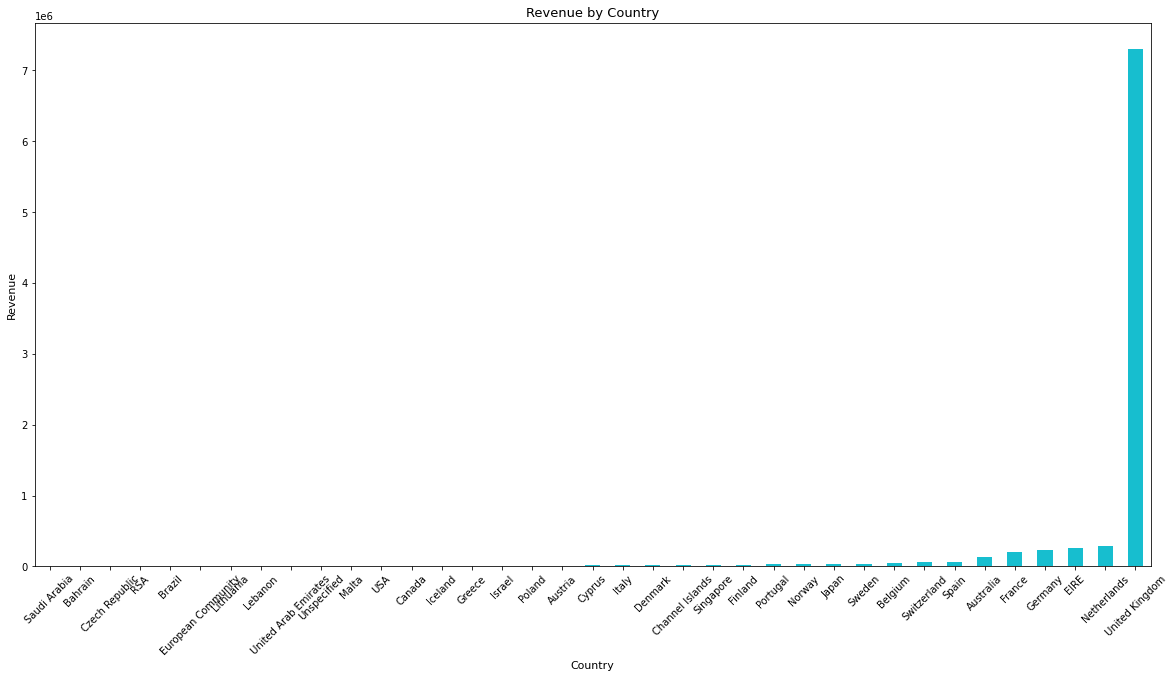

In [8]:
plot = rev_by_countries.plot(kind='bar', color=COLORS[-1], figsize=(20,10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

In [9]:
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

#### 그래프 유틸 함수

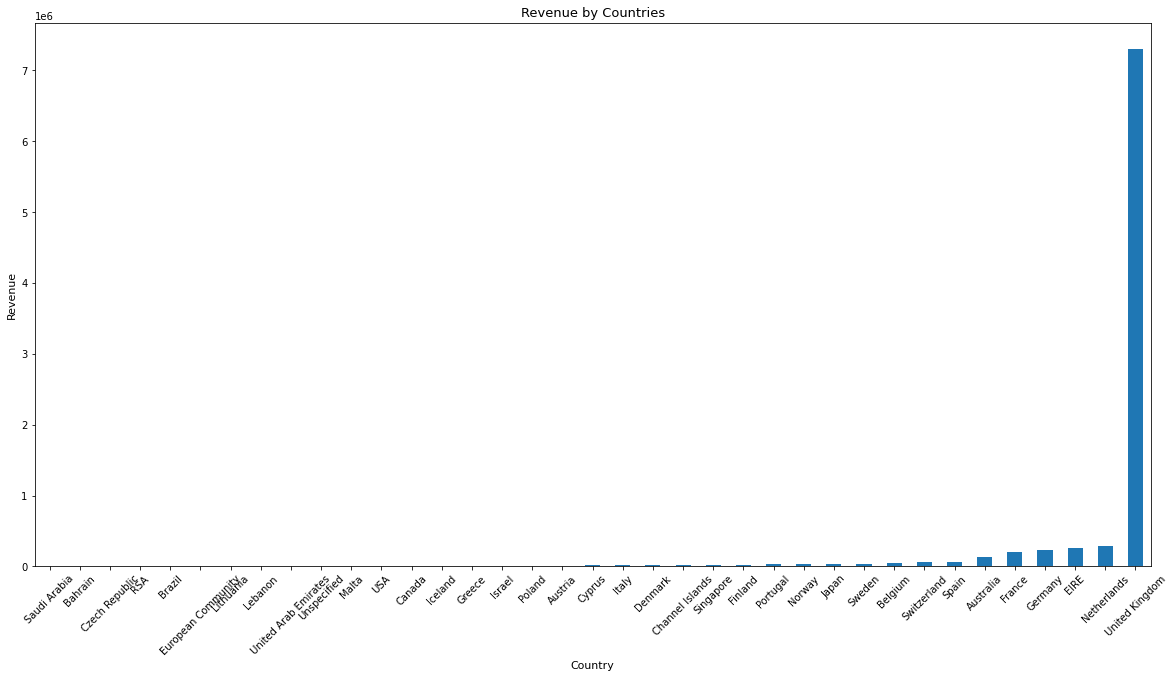

In [33]:
def plot_bar(df, xlabel, ylabel, title, color = COLORS[0], figsize=(20,10), rotation = 45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)
    
plot_bar(rev_by_countries, 'Country', 'Revenue', 'Revenue by Countries')

#### 월별 매출

In [34]:
retail['InvoiceDate'].sort_values(ascending=False) # 최신순으로정렬

397883   2011-12-09 12:50:00
397875   2011-12-09 12:50:00
397882   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
                 ...        
4        2010-12-01 08:26:00
3        2010-12-01 08:26:00
2        2010-12-01 08:26:00
1        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [35]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10: # 10월 보다 작으면 앞에 0 붙여서 달을 만듦
        month = '0' + month
    return str(date.year) + month # 201109 이런식으로..

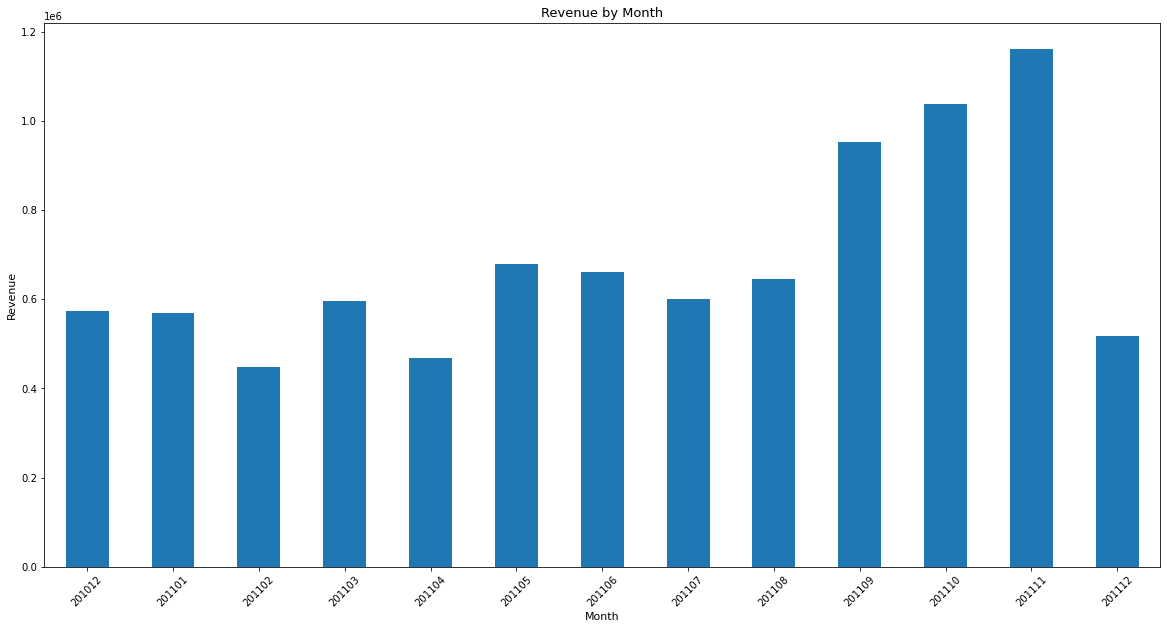

In [36]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

#### 요일별 매출

In [37]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow # 람다를 이용해 date에서 요일별로 뽑아옴

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

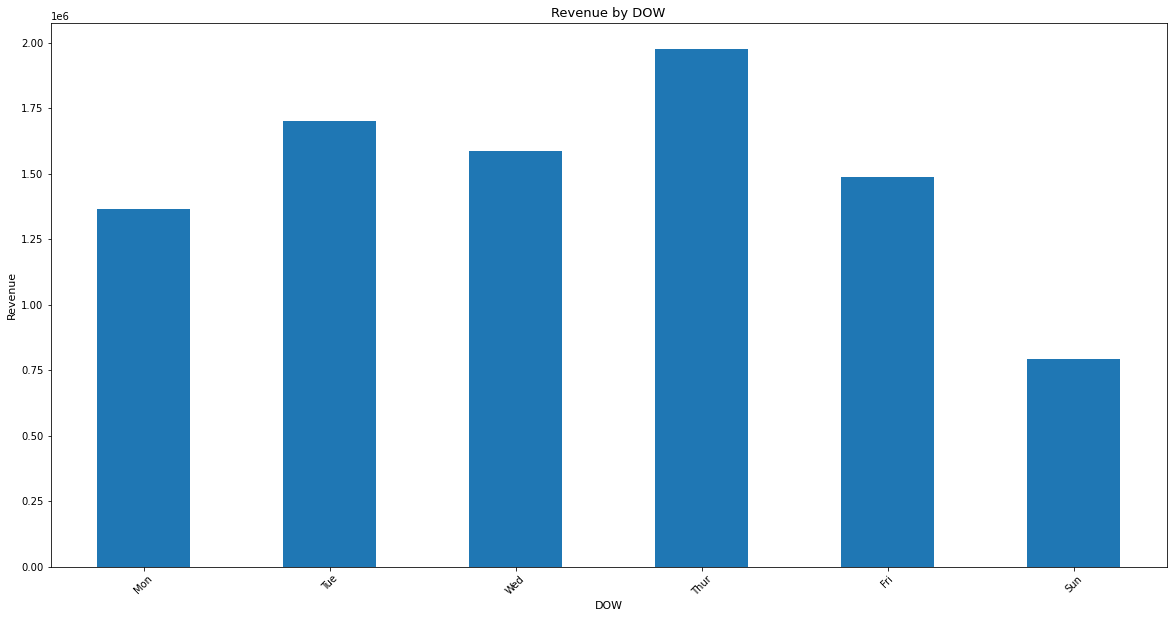

In [38]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

#### 시간별 매출

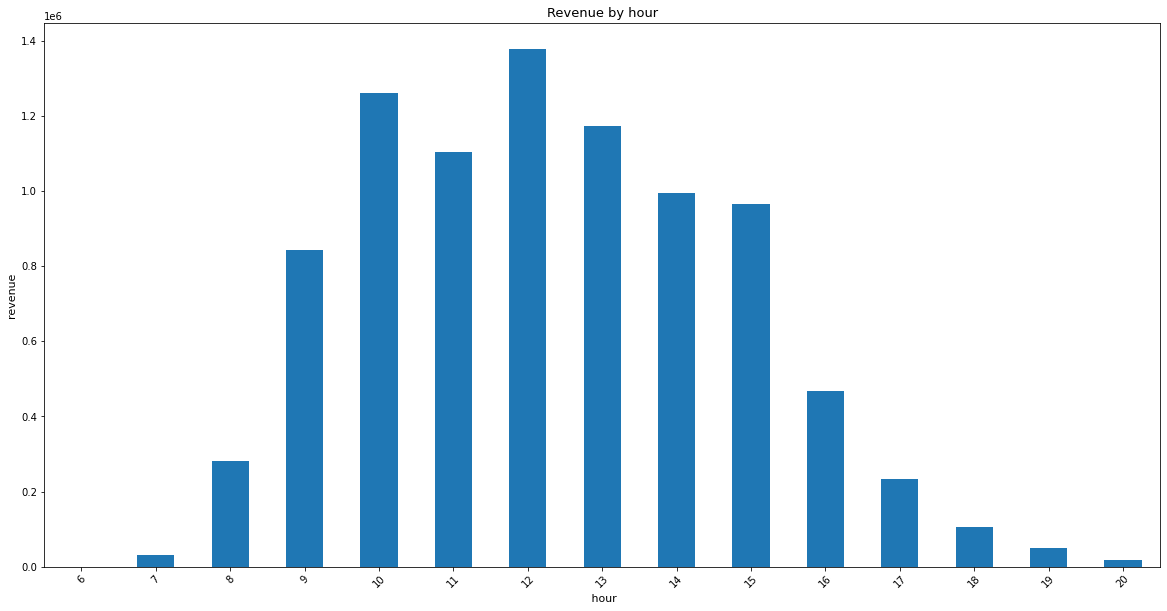

In [39]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, ' hour', 'revenue', 'Revenue by hour')

#### 매출 데이터로부터 insight
- 전체 매출의 82%가 U.K 에서 발생
- 11년도의 가장 많은 주문이 발생항 달은 11월(12월의 전체 데이터가 반영되지 않았다.)
- 11월, 12월의 판매량이 압도적으로 많음
- 일주일 중 목요일까지는 성장세, 이후로 하락(토요일에는 주문이 없다, 사이트 휴무)
- 7시에 주문 시작, 12시까지 증가세, 15시까지 하락, 15시 이후부터 급락


#### 제품별 metrics

- Top 10 판매 제품
- Top 10 매출 제품

In [40]:
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling # 가장 많이 팔린 10개 제품

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [41]:
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue # 매출 탑 10

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

#### top3 아이템의 월별 판매량 추이

In [44]:
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity' , 'CheckoutPrice']].loc[top_selling.index]

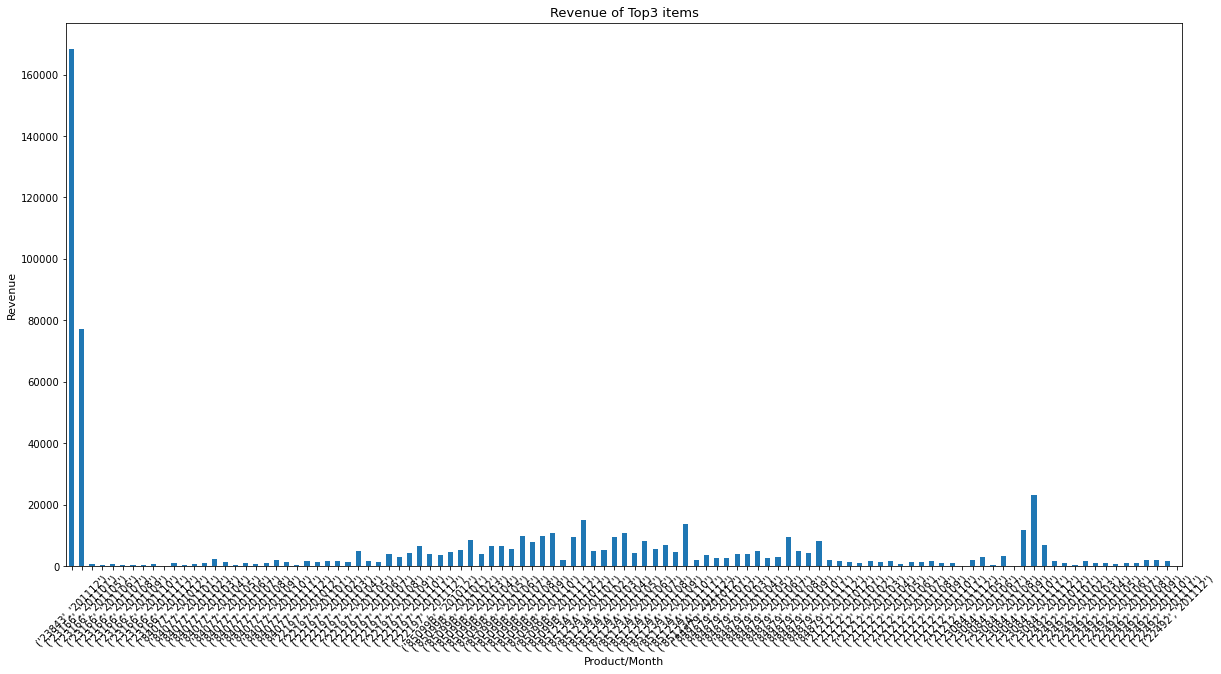

In [45]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of Top3 items')